# Rock Drop
## PH 211 Lab
### Feb 15, 2021
### Zachary Bochanski

The goal of this notebook is to document the process of finding the unknown height of an object through the use of a falling ball of wadded paper. The tools available are a tape measure and stop watch. That's really all we need aside from an understanding of knowing how a falling object (paper ball) somewhat behaves so we can make a logical inference about what the collected data means.

The likely course of action here is finding the time it takes for the same object to fall from various heights. Then make a plot of the data, create a model and use the model to estimate heights.

Why can't we figure out the hight of things knowing the gravitational constant on the surface of earch is around 10m/s/s? Because the paper ball is pretty "floaty" and suseptable to air drag so we need to find a new constant `k`.

### Imports

Importing packages `numpy`, `polynomial`, and `matplotlib` for use within the lab.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Concept of Operations/ Procedure

1. Measure time it takes for paper ball to get dropped from different heights
2. Plot height vs time
3. Fit curve
4. Compart fit to standard kinematic expression (assuming constant acceleration)
5. Plot ideal curve to fit
6. Is terminal velocity suggested?
7. Unknown height

### Measurement Contraption

The ski pole aparatus to hold paper ball consists of multiple cross country ski poles duck taped to a max height of five meters. The main idea behind this method is the ability to be close to where the paper hits the ground. Using the iPhone stopwatch, timing begins after dropping the paper ball off the ski pole then stopping the time when the ball hits the ground. Initially, the concept was to attach a rasperry pi with a camera to the base of the pole contraption to accuratly record the paper hitting the groud. It turned out to be unreliable so the idea was abandoned. Perhaps another time.

### Record Data

To gather 

Two list of data to record, the height and flight time.

1. `time_data = []` in seconds
2. `height_data = []` in meters

| Time Data (s): | Height Data (m): |
| ------ | ------ |
| .43 | .5  | 
| .56 | 1   | 
| .68 | 1.5 | 
| .81 | 2   | 
| .92 | 2.5 | 
| .99 | 3   | 
| 1.15| 3.5 | 
| 1.23| 4   | 
| 1.29| 4.5 | 
| 1.33| 5   |

In [33]:
# Lists to store data
time_data = [0, .43, .56, .68, .81, .92, .99, 1.15, 1.23, 1.29, 1.33]

height_data = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Display data
print("flight time:",time_data)
print("height:",height_data)

timedata_length = len(time_data)
heightdata_length = len(height_data)

# Make sure the lists are equal length
print("number of data points (x):", timedata_length)
print("number of data points (y):", heightdata_length)

flight time: [0, 0.43, 0.56, 0.68, 0.81, 0.92, 0.99, 1.15, 1.23, 1.29, 1.33]
height: [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
number of data points (x): 11
number of data points (y): 11


### Plot for Calibrating Model

- y axis - height (m)
- x axis - drop time (s)

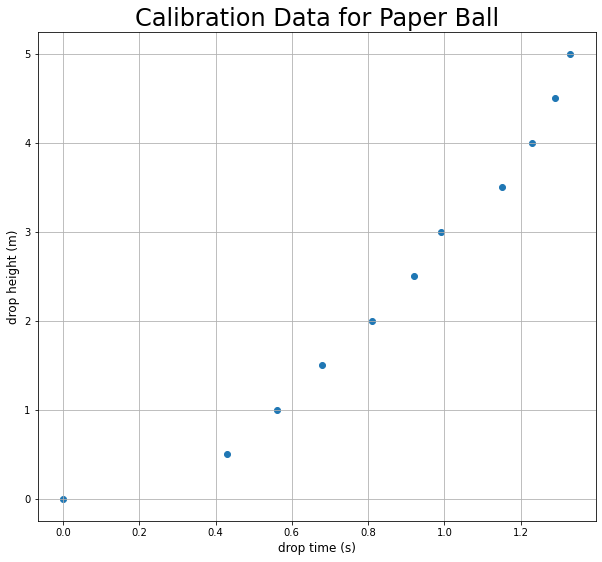

In [34]:
fig1, ax1 = plt.subplots()
ax1.scatter(time_data, height_data)


# Labels
plt.xlabel('drop time (s)', fontsize = 12)
plt.ylabel('drop height (m)', fontsize = 12)
plt.title('Calibration Data for Paper Ball', fontsize = 24)

fig1.set_size_inches(10, 9)
ax1.grid()

# Render plog
plt.show()

### Data Characteristics

At first glance the 3(m) drop height data point is a little "fast" compared to the trend of the other points, most likely a flaw between coordinating the drop of the paper ball and physically hitting the stop/start button; that being said the method of using a couple xc ski poles to hold up the paper ball seemed pretty consistent.

The 0,0 point is important for the begining of calibrating the model. It needs to be made clear that at 0 seconds there is 0 displacement from the paper ball.

The curve matches the concept that the paper is accelerating as it falls toward the center of the earth.

In [37]:
# Finding the change in time between each data point.

# Change in time per half meter
time_change = [] # store calculations for time difference
for i in range(len(time_data)-1):   
    difference = time_data[i+1]-time_data[i] # x_a - x_b
    time_change.append(difference)
print("time change:", time_change)

# Variability of the time data.
time_mean = np.mean(time_data)
time_sigma = np.std(time_data)
variation = 100.*time_sigma/time_mean

# Display Variability
print("Variability is %.2f%%" % variation)

time change: [0.43, 0.13000000000000006, 0.12, 0.13, 0.10999999999999999, 0.06999999999999995, 0.15999999999999992, 0.08000000000000007, 0.06000000000000005, 0.040000000000000036]
Variability is 46.00%


### Curve Fitting

The data points collected can be used to generate a curve that acts as the model for dropping the paper ball. The model can be used to predict the height of unknow objects. A numpy package feature can be used to do this. Create a polynomial object and perform a least squares fit with `numpy`. Least squares fitting is a procedure for finding the bese fitting curve for a specific set of points. The height data and time data are passed into this numpy function.

In [38]:
degree = 3
coefs = ply.polyfit(time_data, height_data,degree)
print("Polynomial coefficients:", coefs)

Polynomial coefficients: [-0.02264075  0.24754497  3.03092043 -0.37381195]


### Least squares fit, ideal physics rock plot

Add the best-fitting curve and the curve of an ideal rock. The `coefs` and their various indexes are used to dictate the shape of the curve.

In [42]:
# Model x values
maxtime = 2.0
numpoints = 20
modeltime = np.linspace(0.,maxtime,numpoints)

# Model height and time list
modelheight = np.full_like(modeltime,0)
idealrock = np.full_like(modeltime,0)

# Predicted heights
modelheight = coefs[0] + coefs[1]*modeltime + \
        coefs[2]* modeltime**2 + coefs[3]*modeltime**3

# calculate an ideal physics rock (no air drag and a = 9.81 m/s/s)
idealrock = 0.5*9.81*modeltime**2
